### Formulating and simulating a hypothesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(11,8)})

#### Hypothesis testing
- Assessment of how reasonable the observed data are assuming a hypothesis is true

#### Null hypothesis
- Another name for the hypothesis you are testing

#### Permutation
- Random reordering of entries in an array

In [3]:
swing = pd.read_csv('2008_swing_states.csv')
swing.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


In [4]:
dem_share_PA = swing.dem_share.loc[swing['state'] == 'PA']

In [5]:
dem_share_OH = swing.dem_share.loc[swing['state'] == 'OH']

In [6]:
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm = np.random.permutation(dem_share_both)
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

In [7]:
def permutation_sample(data1, data2):
    '''Generate a permutation sample from two data sets.'''
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [8]:
sheffield = pd.read_csv('sheffield_weather_station.csv', sep = '\s+', skiprows=8)
sheffield.head(3)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---


In [14]:
rain_june = sheffield.rain.loc[sheffield['mm'] == 6][:-1]
rain_november = sheffield.rain.loc[sheffield['mm'] == 11]
print(len(rain_june), len(rain_november))

133 133


In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

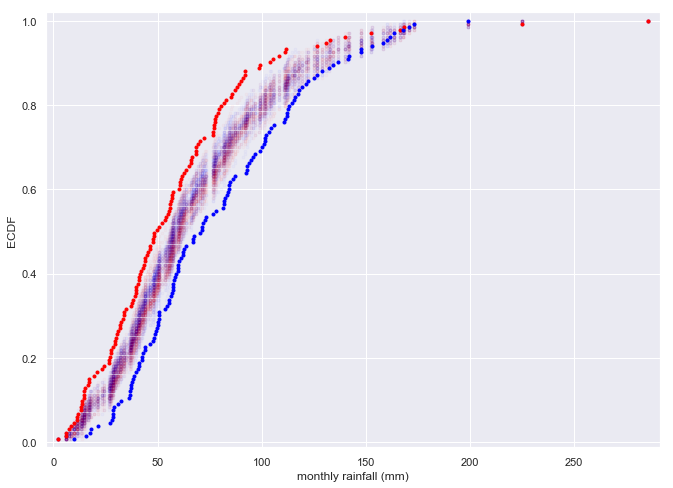

In [18]:
for _ in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)
    
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                color='blue', alpha=0.02)

x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november) 
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')

#### Test statistics and p-values

#### Hypothesis testing 
- Assessment of how reasonable the observed data are assuming a hypothesis is true

#### Test statistic 
- A single number that can be computed from observed data and from data you simulate under the null hypothesis
- It serves as a basis of comparison between the two

#### Permutation replicate

In [19]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

0.2670386702849399

In [20]:
np.mean(dem_share_PA) - np.mean(dem_share_OH)

1.1582360922659518

#### p-value
- The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
- **IT IS NOT THE PROBABILITY THAT THE NULL HYPOTHESIS IS TRUE**

### Statistical significance
- Determined by the smallness of a p-value

### Null hypothesis significance testing (NHST)

In [22]:
def draw_perm_reps(data_1, data_2, func, size=1):
    '''Generates multiple permutaion replicates'''
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

In [23]:
tongues = pd.read_csv('frog_tongue.csv', skiprows=14)
tongues.head(3)

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239


In [40]:
dfA = tongues['impact force (mN)'].loc[tongues['ID'] == 'II']/1000
dfB = tongues['impact force (mN)'].loc[tongues['ID'] == 'IV']/1000
df_A = pd.DataFrame({'ID': 'A', 'impact_force': dfA})
df_B = pd.DataFrame({'ID': 'B', 'impact_force': dfB})
df = pd.concat([df_A, df_B])
df

,ID,impact_force
20,A,1.612
21,A,0.605
22,A,0.327
23,A,0.946
24,A,0.541
25,A,1.539
26,A,0.529
27,A,0.628
28,A,1.453
29,A,0.297


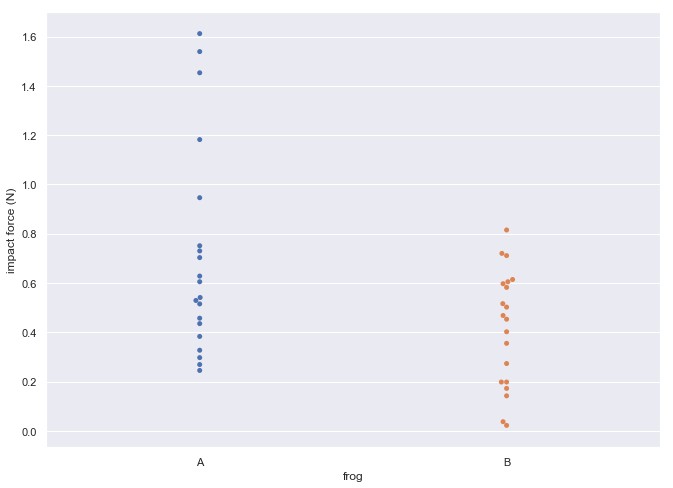

In [43]:
_ = sns.swarmplot(x='ID', y='impact_force', data=df)
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')